# **Edward Fabian Goyeneche Velandia**
## Signal Theory


## Red Neuronal con Keras


### Documentacion del dataset "F1 Drivers dataset"
Ya sea que sea un entusiasta experimentado de los deportes de motor, un aspirante a científico de datos o un fanático curioso, este conjunto de datos abre las puertas a una gran cantidad de oportunidades analíticas. Explora la evolución de las estrategias de los pilotos, las adaptaciones específicas de las pistas y la dinámica de equipo que contribuyen a la intensa competencia presenciada en circuitos icónicos de todo el mundo. Descubra patrones, valores atípicos y tendencias que iluminan los matices de las carreras de F1 y arrojan luz sobre lo que separa a los campeones de los contendientes.



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD


## Relacion entre  los podiums obtenidos y las  carreras ganadas de un piloto de F1

In [3]:

# Cargar el conjunto de datos
df = pd.read_csv('F1drivers_Dataset.csv')

# Extraer las columnas 'podiums' y 'race_wins' y convertirlas a arrays de numpy
podiums = df['Podiums'].to_numpy()
race_wins = df['Race_Wins'].to_numpy()

# Imprimir los datos extraídos
print("Posiciones de Pole:", podiums)
print("Victorias de Carreras:", race_wins)


Posiciones de Pole: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.  23.  32.
   0.   0.   1.  99.   0.   1.   0.  11.   1.   0.   0.  19.   1.   0.
   9.   0.   0.   0.   0.  22.   2.  17.   0.   0.   0.   0.   1.   1.
   0.   1.   0.   0.   0.   0.   8.   0.   0.   0.   0.   0.  68.   0.
   0.   0.   0.   0.   0.   0.   0.   9.   0.   0.   0.   0.   8.   0.
   0.   0.  48.   1.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   3.   0.   0.   0.   2.   1.   0.   0.
   0.   0.  67.   0.   0.  15.   1.   0.   0.  31.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   0.   0.  10.   0.   0.   0.   0.   9.   0.
   3.   0.   0.   0.   0.   0.   0.   0.   0.  50.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   3.   0.   1.   3.   0.   5.  13.   0.   0.
   0.   0.   0.   0.   0.   0.   9.   0.   0.   0.   1.   0.   0.   0.
   0.  32.   0.   9.   0.   0.   0.   0.   0.   0.   0.  62.   2.   0.
   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  

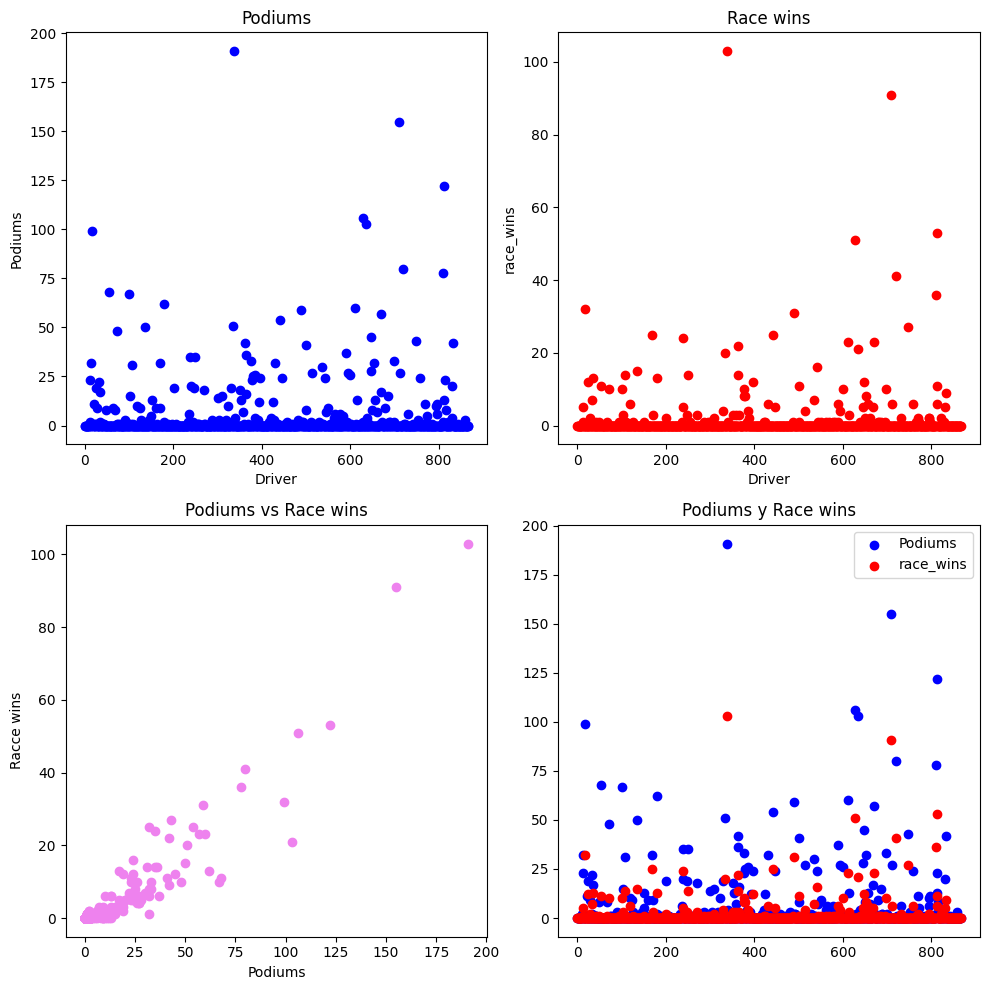

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Grafico de dispersion de  podiums
axs[0, 0].scatter(range(len(podiums)), podiums, color='blue')
axs[0, 0].set_title('Podiums')
axs[0, 0].set(xlabel='Driver', ylabel='Podiums')

#Grafico de didispersion de victorias de carreras
axs[0, 1].scatter(range(len(race_wins)),race_wins, color='red')
axs[0, 1].set_title('Race wins')
axs[0, 1].set(xlabel='Driver', ylabel = 'race_wins')



#Grafico de Dispersión de Podiums vs Victorias de Carreras  
axs[1, 0].scatter(podiums,race_wins, color='violet')
axs[1, 0].set_xlabel('Podiums')
axs[1, 0].set_ylabel('Racce wins')
axs[1, 0].set_title('Podiums vs Race wins')


#Grafico dedispersion  Conjunto
axs[1, 1].scatter(range(len(podiums)),podiums, color='blue',label='Podiums')
axs[1, 1].scatter(range(len(race_wins)),race_wins,color='red',label="race_wins")
axs[1, 1].set_title('Podiums y Race wins')
axs[1, 1].legend()
plt.tight_layout()
plt.show()


In [5]:
podiums_train = podiums
race_wins_train = race_wins

Epoch 1/1000
28/28 [==============================] - 1s 4ms/step - loss: 92.4994
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 87.6893
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 83.1935
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 79.5519
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 75.9137
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 72.7478
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 69.9827
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 67.1060
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 64.9873
Epoch 10/1000
28/28 [==============================] - 0s 2ms/step - loss: 62.5733
Epoch 11/1000
28/28 [==============================] - 0s 1ms/step - loss: 60.7952
Epoch 12/1000
28/28 [==============================] - 0s 2ms/step - loss: 59.3420
Epoch 13/1000

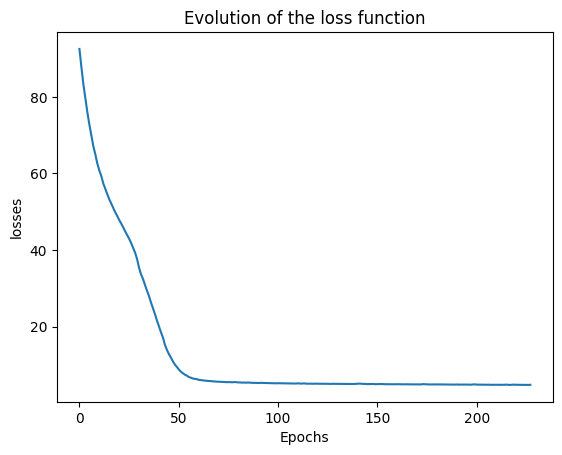

In [6]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
#se entrena el modelo
model = Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))  # Add more neurons
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())  # Change the optimizer

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10)

history = model.fit(podiums_train, race_wins_train, epochs=1000, verbose=1, callbacks=[early_stopping])  # Increase the number of epochs

# Graficar la evolución de la función de pérdida
losses = history.history['loss']

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel("losses")
plt.title("Evolution of the loss function")
plt.show()


In [61]:

# Define the test data
podiums_test = np.linspace(0,250 , 200)
race_wins_test = np.linspace(0, 100 , 200)

# Generate predictions using the trained model
race_wins_pred = model.predict(podiums_test)

# Calculate the mean squared error (MSE) between the test data and the predictions
mse = np.mean((race_wins_test - race_wins_pred.squeeze())**2)



7/7 [==============================] - 0s 2ms/step


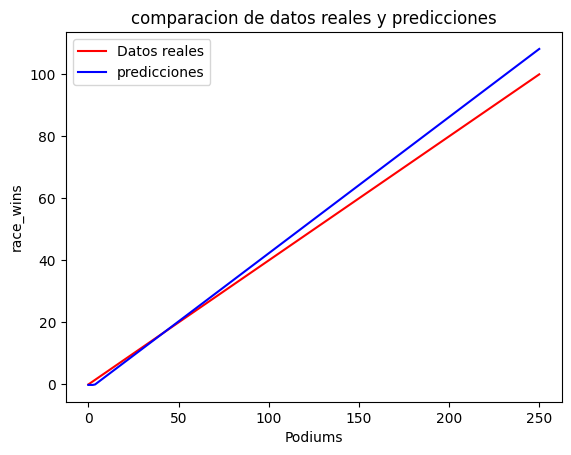

In [62]:
# Graficar los datos de prueba y las predicciones
plt.plot(podiums_test,race_wins_test,"r",label="Datos reales")
plt.plot(podiums_test,race_wins_pred,"b",label="predicciones")
plt.legend()
plt.xlabel("Podiums")
plt.ylabel("race_wins")
plt.title("comparacion de datos reales y predicciones")
plt.show()



----------------------------------------------------
# BASE DATOS DE TEMPERATURA  VS VALOS DEL HELADO


La base de datos de donde se puede ver el valor  de los helado y  la temperaturas en que se compran

In [64]:
# carga el conjunto de datos
df = pd.read_csv('IceCreamSales-temperatures.csv')

# Extrae las columnas 'Temperature' y 'Ice Cream Sales' y conviértelas a arrays de numpy
temperature = df['Temperature'].to_numpy()
ice_cream_sales = df['Ice Cream Profits'].to_numpy()


print("Temperatures:", temperature)
print("Ice Cream Sales:", ice_cream_sales)


Temperatures: [ 39  40  41  42  43  43  44  44  45  45  45  46  46  47  48  48  48  48
  48  48  49  49  50  50  50  50  50  51  51  52  52  52  52  52  53  53
  53  53  54  54  54  54  54  54  54  54  54  55  55  55  55  56  56  57
  57  58  58  58  58  58  58  59  59  59  59  59  59  59  59  60  60  60
  60  60  61  61  61  61  61  61  61  61  61  62  62  62  62  63  63  63
  63  63  64  64  64  64  64  64  64  64  64  65  65  65  65  65  65  65
  65  65  66  66  66  66  66  66  66  66  66  66  66  66  66  66  67  67
  67  67  67  67  68  68  68  68  68  68  68  68  68  68  68  68  69  69
  69  69  69  69  70  70  70  70  70  70  70  70  70  71  71  71  71  71
  71  71  71  71  72  72  72  72  72  72  72  72  72  72  73  73  73  73
  73  73  73  73  73  74  74  74  74  74  74  74  74  74  74  74  74  75
  75  75  75  75  75  76  76  76  76  76  76  76  76  76  76  76  77  77
  77  77  77  77  77  77  77  77  77  77  77  77  77  78  78  78  78  78
  78  78  78  78  78  78  78  79  79 

In [ ]:
Get-ChildItem -Path {directory_path} -Recurse

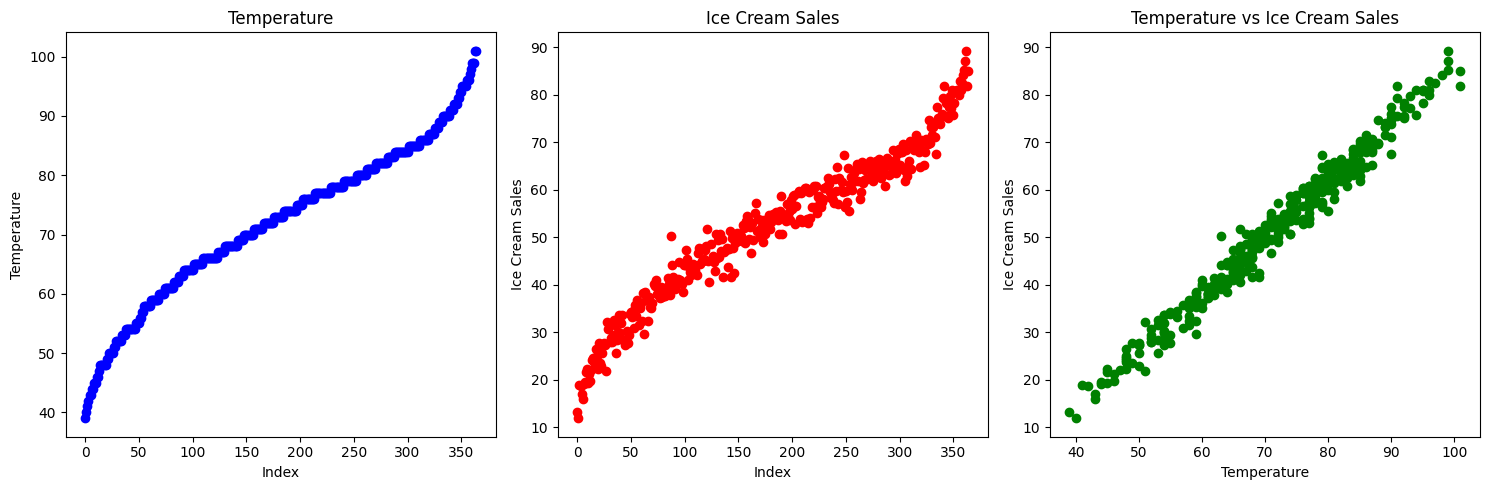

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# #grafico de dispersion de Temperatura
axs[0].scatter(range(len(temperature)), temperature, color='blue')
axs[0].set_title('Temperature')
axs[0].set(xlabel='Index', ylabel='Temperature')

# Grafico de dispersion de Ventas de helados
axs[1].scatter(range(len(ice_cream_sales)), ice_cream_sales, color='red')
axs[1].set_title('Ice Cream Sales')
axs[1].set(xlabel='Index', ylabel='Ice Cream Sales')

# grafico de dispersion de Temperatura vs Ventas de heladoss
axs[2].scatter(temperature, ice_cream_sales, color='green')
axs[2].set_title('Temperature vs Ice Cream Sales')
axs[2].set(xlabel='Temperature', ylabel='Ice Cream Sales')

plt.tight_layout()
plt.show()




Epoch 1/1000
12/12 [==============================] - 0s 2ms/step - loss: 7687.7397
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 6986.5845
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 6333.0693
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 5718.9961
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 5148.8975
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 4617.3223
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 4135.4810
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 3679.9658
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 3266.2112
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 2883.9985
Epoch 11/1000
12/12 [==============================] - 0s 2ms/step - loss: 2532.7539
Epoch 12/1000
12/12 [==============================] - 0s 2ms/step - loss:

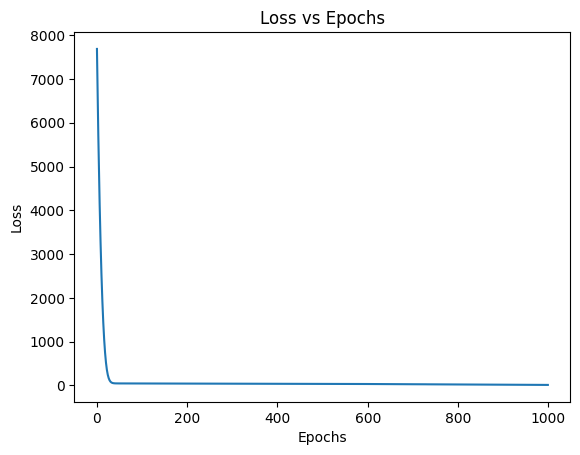

In [66]:
# Deefine el modelo
model = Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))  # Add more neurons
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())  # Change the optimizer

early_stopping = EarlyStopping(monitor='loss', patience=10)

#enrtrenar el modelo
history = model.fit(temperature, ice_cream_sales, epochs=1000, verbose=1)
losses = history.history['loss']

# graficar la evolucion de la funcion de perdida
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()







1/1 [==============================] - 0s 27ms/step


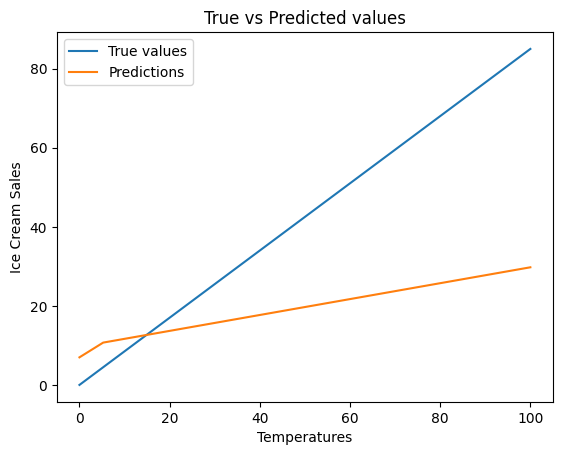

In [84]:

temperatures_test = np.linspace(0,100, 20)
ice_cream_sales_test = np.linspace(0, 85, 20)
ice_cream_sales_pred = model.predict(temperatures_test)

mse = np.mean((ice_cream_sales_test - ice_cream_sales_pred.squeeze())**2)

plt.plot(temperatures_test, ice_cream_sales_test, label='True values')
plt.plot(temperatures_test, ice_cream_sales_pred, label='Predictions')
plt.legend()
plt.xlabel('Temperatures')
plt.ylabel('Ice Cream Sales')
plt.title('True vs Predicted values')
plt.show()


# Dataset  ADVERTISING(Publicidad) 


 Es una base de datos que contiene información sobre una campaña publicitaria por medios como radio tv etc. 

In [69]:
# Load the new dataset
df = pd.read_csv('Advertising.csv')

# sacar las columnas radio y ventas y convertirlas a arrays de numpy

feature = df['Radio'].to_numpy()
target = df['Sales'].to_numpy()


Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 158.0066
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 131.8080
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 109.9945
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 91.7394
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 77.3794
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 66.1186
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 57.2974
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 51.4953
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 47.6809
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 45.0917
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 43.2914
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: 42.4801
Epoch 13/1000
7/7 [===============

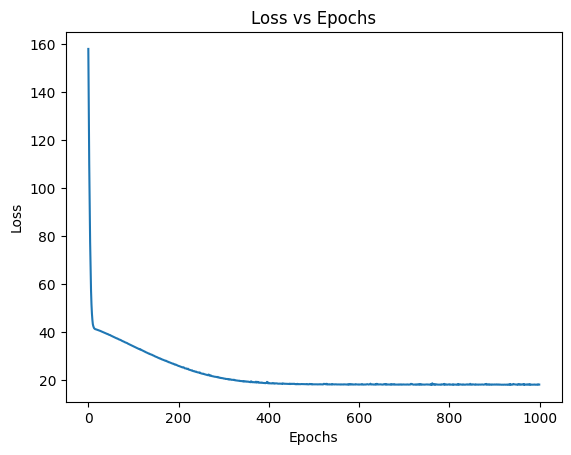

In [71]:
# Deefine el modelo
model = Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))  # Add more neurons
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())  # Change the optimizer

early_stopping = EarlyStopping(monitor='loss', patience=10)

# Entrenar el modelo
history = model.fit(feature, target, epochs=1000, verbose=1)
losses = history.history['loss']

#graficar la evolucion de la funcion de perdida 
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

2/2 [==============================] - 0s 3ms/step


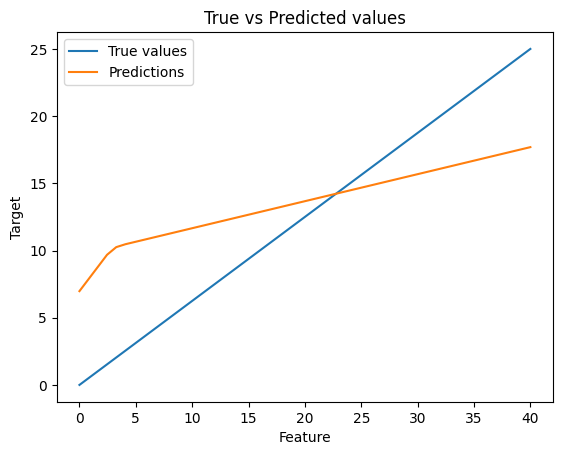

In [73]:



# genera datos de prueba y predicciones
feature_test = np.linspace(0, 40, 50)
target_test = np.linspace(0, 25, 50)
target_pred = model.predict(feature_test)

# Calcula el error cuadrático medio
mse = np.mean((target_test - target_pred.squeeze())**2)


# Graficar los datos de prueba y las predicciones
plt.plot(feature_test, target_test, label='True values')
plt.plot(feature_test, target_pred, label='Predictions')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('True vs Predicted values')
plt.show()
